In [1]:
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_tree
import random
SEED = 8
random.seed(SEED)
np.random.seed(SEED)
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings

In [3]:
#https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [5]:
X_train_ = pd.read_csv('X_train_.csv')# loading train data saved previously
X_test_ = pd.read_csv('X_test_.csv')
y_train_ = pd.read_csv('y_train_.csv')
y_test_ = pd.read_csv('y_test_.csv')

In [12]:
X_train_.columns = X_train_.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))# adjusting col names for XGBoost
X_test_.columns = X_test_.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))# adjusting col names for XGBoost
# create model instance
XGBoost_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, colsample_bytree = 0.6, objective='binary:logistic')
param_grid = [
    {'learning_rate': [0.001, 0.05, 0.1],
    'colsample_bytree': [ 0.7, 0.6, 0.5]}
    ]
clf = GridSearchCV(XGBoost_model ,param_grid = param_grid, cv=5)
clf.fit(X_train_, y_train_)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid=[{'colsample_bytree': [0.7, 0.6, 0.5],
                          'learning_rate': [0.001, 0.05, 0.1]}])

In [14]:
XGBoost_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=clf.best_params_['learning_rate'], colsample_bytree = clf.best_params_['colsample_bytree'], objective='binary:logistic')
XGBoost_model.fit(X_train_, y_train_)
y_train_XGBoost = XGBoost_model.predict(X_train_)
y_test_XGBoost = XGBoost_model.predict(X_test_)
XGBoost_model.save_model('XGBoost_Recommendation.model')
np.save('y_train_pred_XGBoost.npy', y_train_XGBoost)
np.save('y_test_pred_XGBoost.npy', y_test_XGBoost)

/opt/anaconda3/envs/Torch/lib/python3.12/site-packages/xgboost/sklearn.py:1028: UserWarning: [00:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


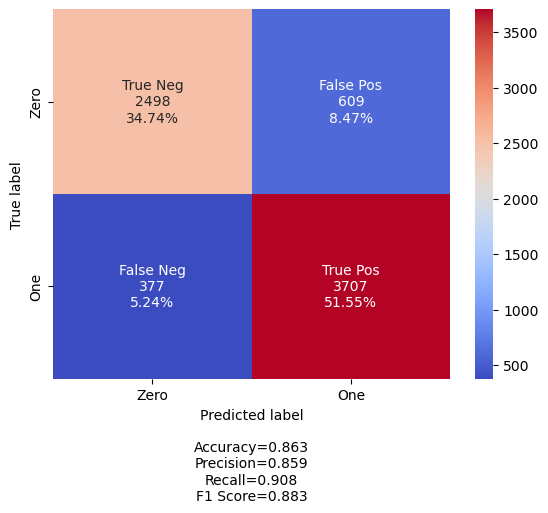

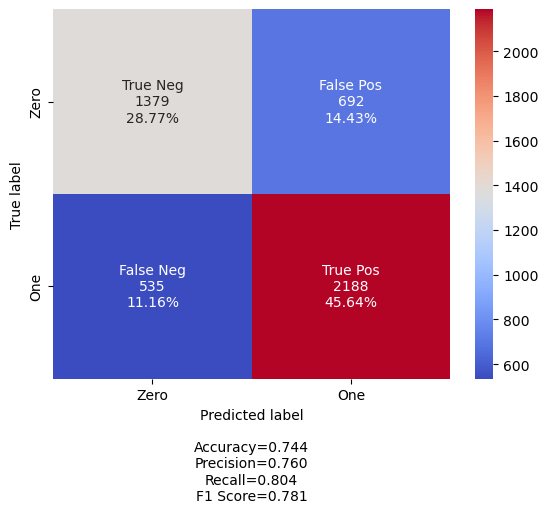

In [16]:
cf_matrix_train = confusion_matrix(y_train_, y_train_XGBoost)
cf_matrix_test = confusion_matrix(y_test_, y_test_XGBoost)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm')

make_confusion_matrix(cf_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm')